### DBSCAN
- k-means 클러스터링의 특징
    - 단순하고 강력한 클러스터링 방법
    - 군집의 모양이 원형이 아닌경우에 잘 동작하지 않음
    - k 값을 사용자가 지정

- DBSCAN 클러스터링의 특징
    - Density-based Spatial Clustering of Applications with Noise
    - 데이터의 밀집 정도를 사용
    - 데이터의 군집형태와 관계없이 클러스터링이 가능
    - 군집의 갯수를 사용자가 지정할 필요가 없음!
    - Density-based clustering 중 가장 성능이 우수
    - eps-neighbors와 MinPts를 사용하여 군집구성

Tip : 비지도 학습은 어려워서 다양한 모델 사용이 도움이 되기도 함<br>
e.g. DBSCAN으로 k 초기값을 찾고 이 k를 k-means에 적용하여 모델링

- DBSCAN 알고리즘
    - eps-neighbors : 한 데이터를 중심으로 epsilon($\epsilon$)거리 이내의 데이터들을 한 군집으로 구성
    - MinPts : 한 군집은 Minpts보다 많거나 같은 수의 데이터로 구성됨
    - 데이터의 분류
        - Core : 군집을 찾는데 기준이 되는 데이터
        - Border : 군집에 포함은 되지만 군집을 찾는데 기준이 되지 못하는 데이터
        - Noise : 아웃라이어 데이터

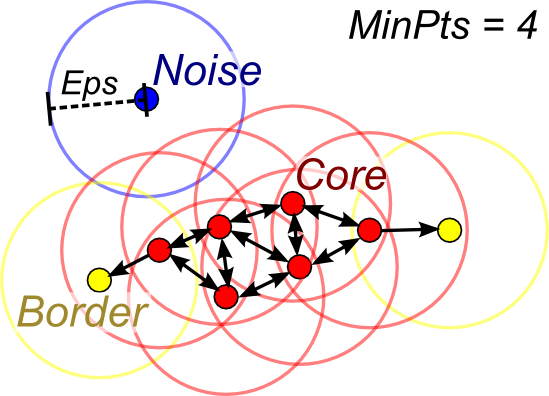

In [1]:
from IPython.display import Image
Image('./imgs/dbscan_1.png')

- DBSCAN 하이퍼 파라미터(hyper parameter)의 설정 및 특징
    - MinPts 설정
        - eps값 내에 있는 데이터의 수
        - eps값 내에 있는 데이터의 수가 MinPts개 이상이면 Core 데이터가 됨
        - 간단한 설정 : 변수의 수 + 1로 설정
        - 3이상으로 설정
    - eps 설정
        - 너무 작으면 많은 데이터가 노이즈로 구분됨
        - 너무 크면 군집이 하나가 될수 있음
        - K-nearest neighbor의 거리를 그래프로 나타낸후 거리(유클리드 거리 (Euclidean Distance))가 급격하게 증가하는 지점을 eps 값으로 설정

In [2]:
%config InlineBackend.figure_formats = {'png', 'retina'}

import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import make_circles, make_moons, make_blobs
from sklearn.cluster import DBSCAN

#### 1. 샘플 데이터 생성

In [4]:
n_samples = 200

X1, y1 = make_circles(n_samples=n_samples, factor=0.5, noise=0.05, random_state=1)
X2, y2 = make_moons(n_samples=n_samples, noise=0.1, random_state=1)

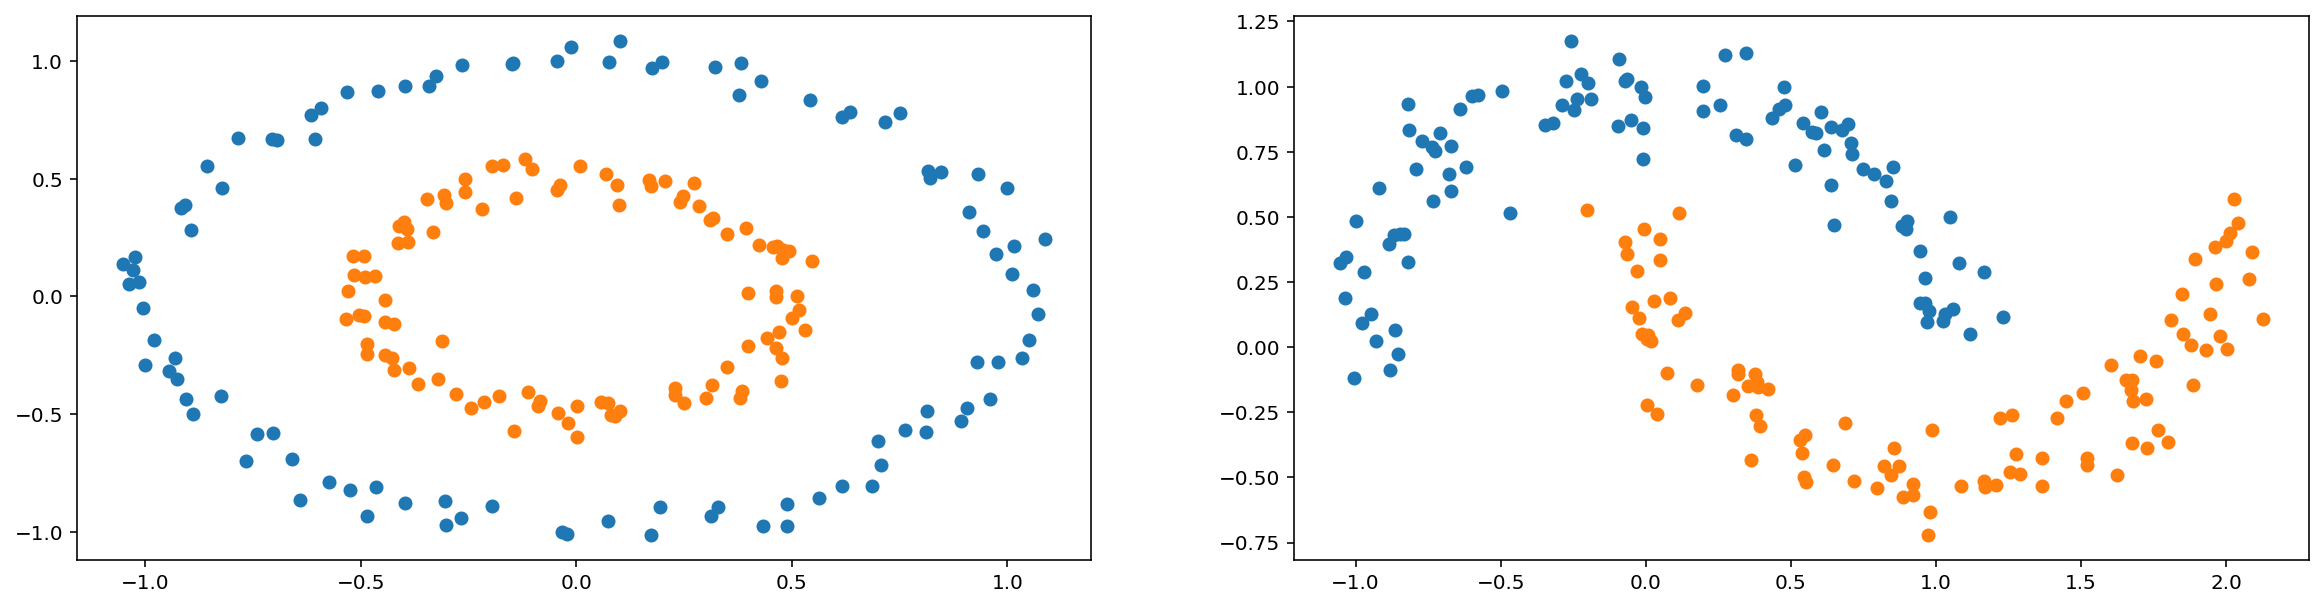

In [5]:
# 동심원 군집
data_1 = X1[y1 == 0]
data_2 = X1[y1 == 1]

# 초승달 군집
data_3 = X2[y2 == 0]
data_4 = X2[y2 == 1]

plt.figure(figsize=(20, 5))

# 동심원 군집
plt.subplot(121)
plt.scatter(data_1[:, 0], data_1[:, 1])
plt.scatter(data_2[:, 0], data_2[:, 1])

# 초승달 군집
plt.subplot(122)
plt.scatter(data_3[:, 0], data_3[:, 1])
plt.scatter(data_4[:, 0], data_4[:, 1])

plt.show()

#### 2. K-means 사용

In [6]:
from sklearn.cluster import KMeans

In [7]:
model_1 = KMeans(n_clusters=2, random_state=0).fit(X1)

C:\Users\0108s\miniforge3\envs\fastcampus\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


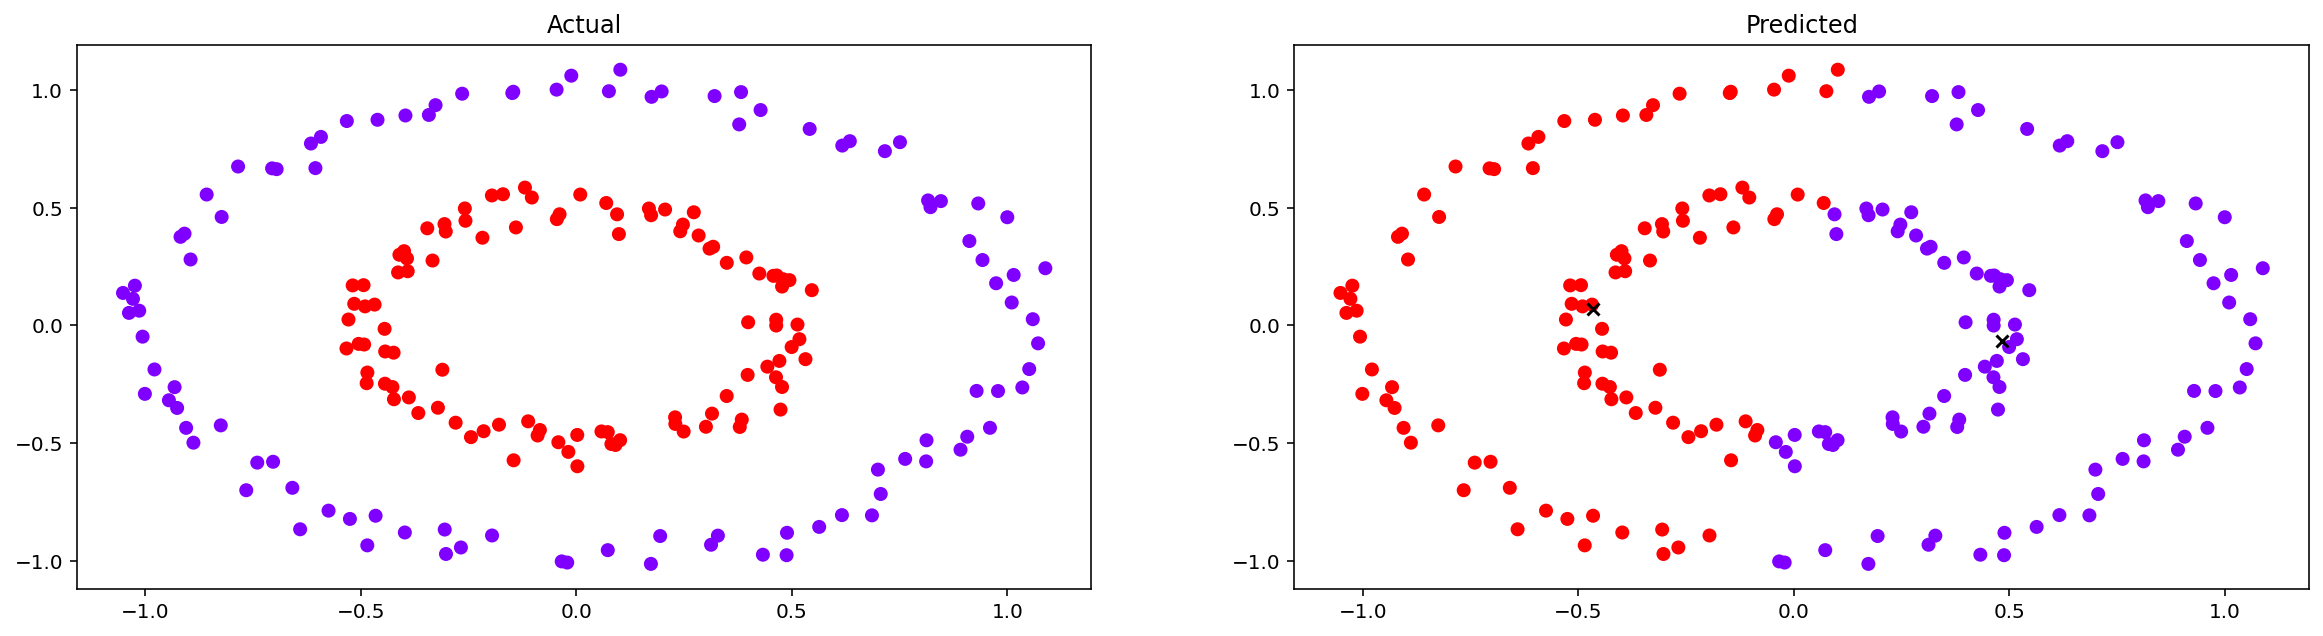

In [8]:
plt.figure(figsize=(20, 5))

# 실제 데이터
plt.subplot(121)
plt.scatter(X1[:,0], X1[:,1], c=y1, cmap="rainbow")
plt.title("Actual")

# 예측데이터
plt.subplot(122)
plt.scatter(X1[:,0], X1[:,1], c=model_1.labels_, cmap="rainbow")
plt.title("Predicted")

# 포인트
plt.scatter(model_1.cluster_centers_[:,0], model_1.cluster_centers_[:,1], c="black", marker="x")
plt.show()

In [9]:
model_2 = KMeans(n_clusters=2, random_state=0).fit(X2)

C:\Users\0108s\miniforge3\envs\fastcampus\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


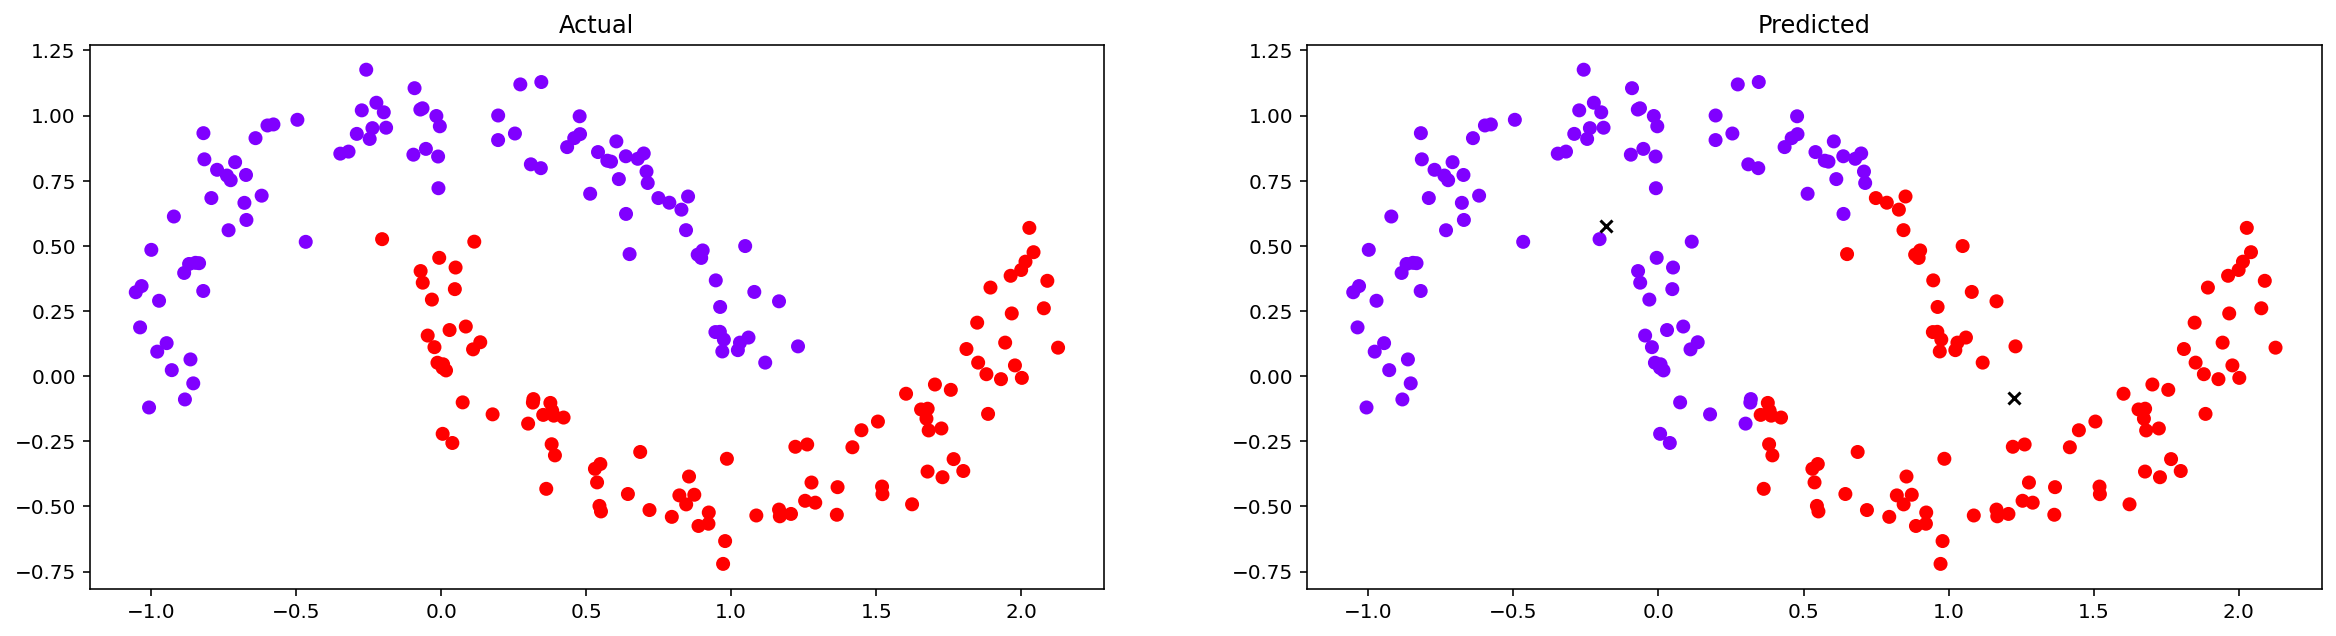

In [10]:
plt.figure(figsize=(20, 5))

# 실제 데이터
plt.subplot(121)
plt.scatter(X2[:,0], X2[:,1], c=y2, cmap="rainbow")
plt.title("Actual")

# 예측데이터
plt.subplot(122)
plt.scatter(X2[:,0], X2[:,1], c=model_2.labels_, cmap="rainbow")
plt.title("Predicted")

# 포인트
plt.scatter(model_2.cluster_centers_[:,0], model_2.cluster_centers_[:,1], c="black", marker="x")
plt.show()

#### 3. DBSCAN 사용

In [11]:
eps = 0.3

model_3 = DBSCAN(eps=eps).fit(X1)

# MinPts 설정 : min_samples
# model_3 = DBSCAN(eps=eps, min_samples=3).fit(X1)

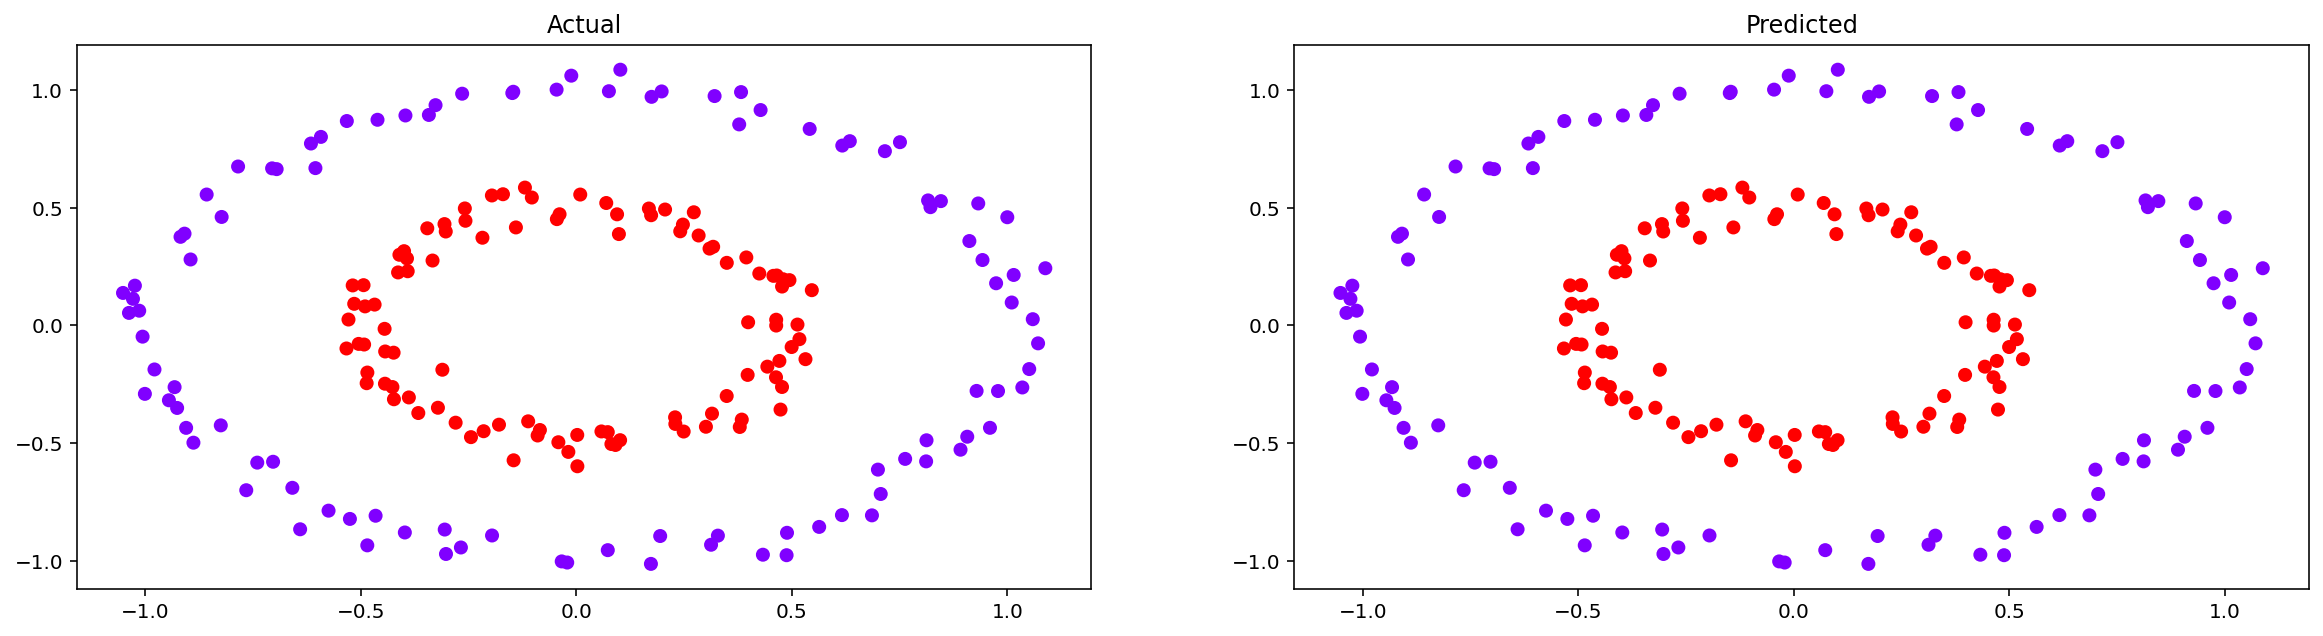

In [12]:
plt.figure(figsize=(20, 5))

# 실제 데이터
plt.subplot(121)
plt.scatter(X1[:,0], X1[:,1], c=y1, cmap="rainbow")
plt.title("Actual")

# 예측데이터
plt.subplot(122)
plt.scatter(X1[:,0], X1[:,1], c=model_3.labels_, cmap="rainbow")
plt.title("Predicted")

# 포인트
plt.show()

In [25]:
eps = 0.23 # eps수치에 굉장히 예민함
# eps = 0.21 # eps 값을 높이면 더 정확한 클러스터링이 됨

model_4 = DBSCAN(eps=eps).fit(X2)

# MinPts 설정 : min_samples
# model_4 = DBSCAN(eps=eps, min_samples=3).fit(X2)

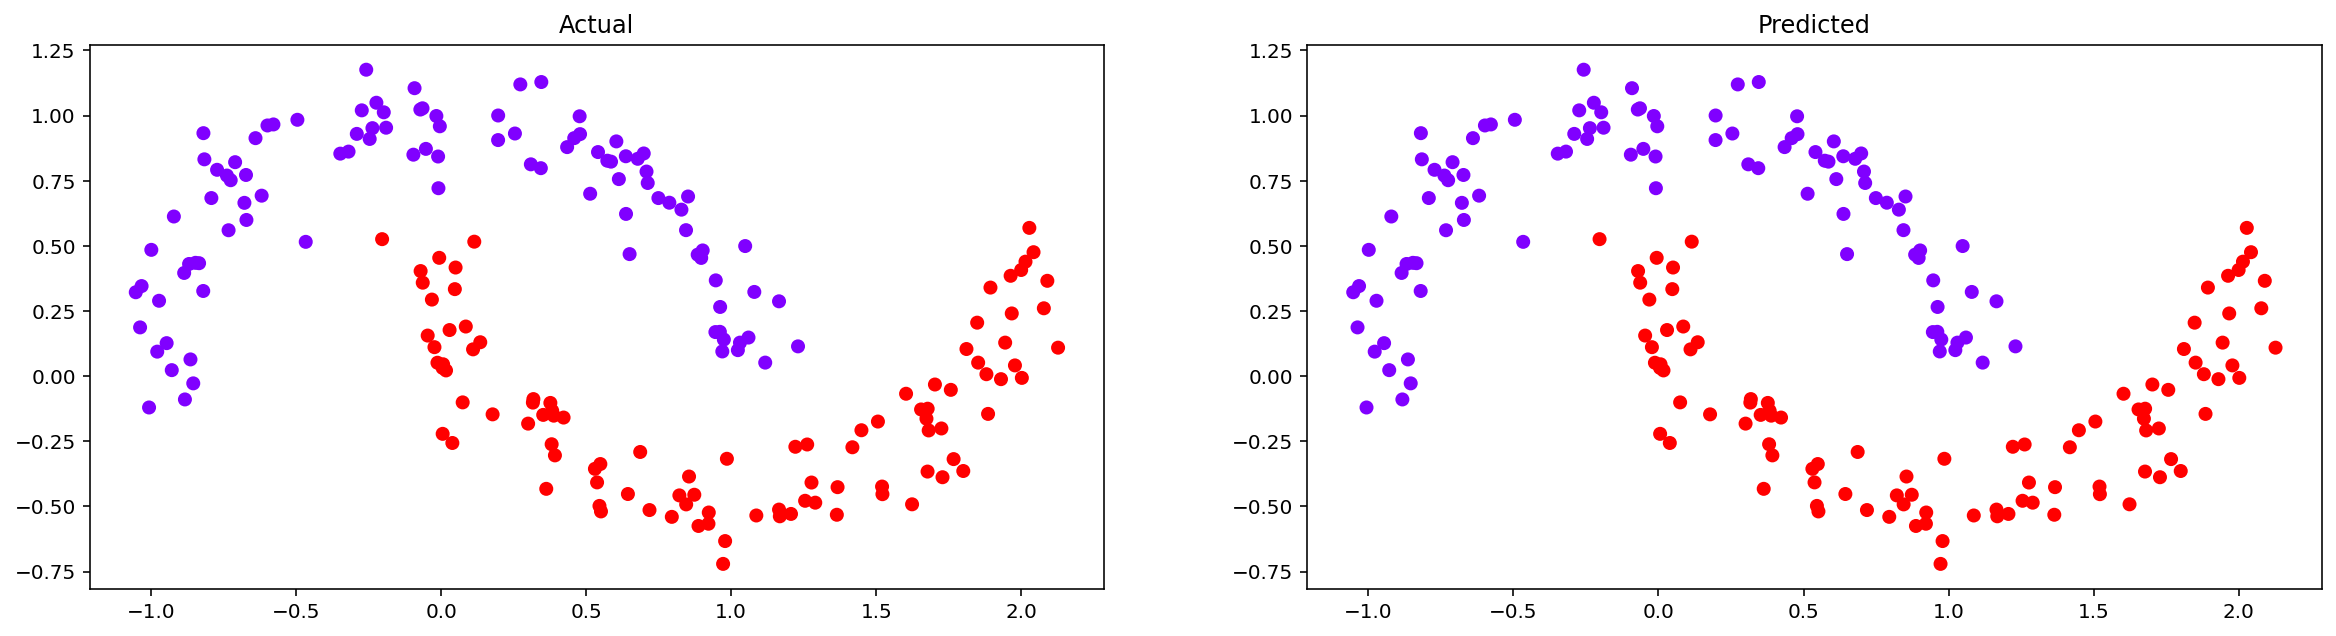

In [26]:
plt.figure(figsize=(20, 5))

# 실제 데이터
plt.subplot(121)
plt.scatter(X2[:,0], X2[:,1], c=y2, cmap="rainbow")
plt.title("Actual")

# 예측데이터
plt.subplot(122)
plt.scatter(X2[:,0], X2[:,1], c=model_4.labels_, cmap="rainbow")
plt.title("Predicted")

# 포인트
plt.show()

#### Core, Border, Noise 데이터 확인
- 0 : core
- 1 : border
- 2 : noise
    - noise 데이터는 아웃라이어로 지정해서 데이터를 제거할수 있다.

In [27]:
df = pd.DataFrame(X2)
# border data
df["cbn"] = 1
df.tail(2)

,0,1,cbn
198,0.844979,-0.492335,1
199,0.344013,0.798167,1


In [28]:
# noise data : model_4.labels_ 에서 -1d인 데이터가 noise 데이터
# noise data를 2로 변경
df["cbn"][model_4.labels_ == -1] = 2

C:\Users\0108s\AppData\Local\Temp\ipykernel_15124\2221733581.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["cbn"][model_4.labels_ == -1] = 2


In [29]:
# core data
# model_4 = dbscan -> core_sample_indices
df.loc[model_4.core_sample_indices_, "cbn"] = 0

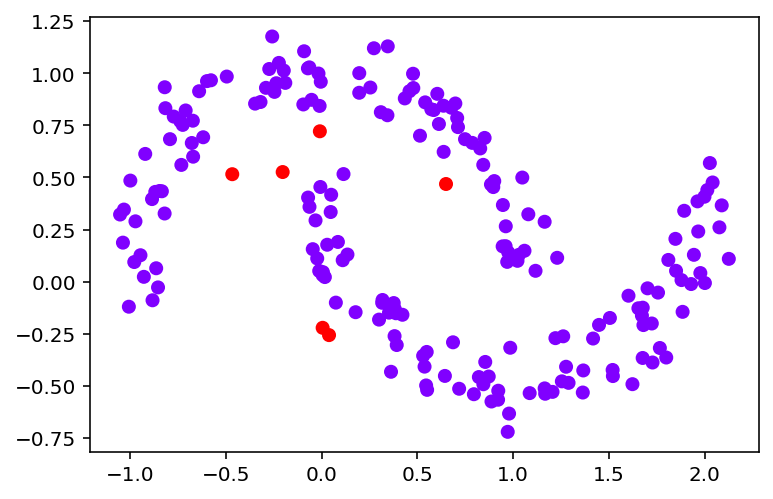

In [30]:
plt.scatter(df[0], df[1], c=df["cbn"], cmap="rainbow")
plt.show()

In [31]:
# 아웃라이어 데이터
df[df["cbn"] != 2]

,0,1,cbn
0,-0.290292,0.929759,0
1,0.345680,1.128810,0
2,0.479168,0.928778,0
3,-0.063022,0.358665,0
4,1.811069,0.104030,0
...,...,...,...
195,0.546121,-0.498178,0
196,0.686508,-0.291147,0
197,-0.815666,0.832118,0
198,0.844979,-0.492335,0


#### 4. 최적의 eps 값 설정
- K-nearest neighbor의 거리를 그래프로 나타낸후 거리가 급격하게 증가하는 지점을 eps 값으로 설정
- 모든 데이터의 케이스에 적용되는것은 아님

#### 4.1 샘플 데이터

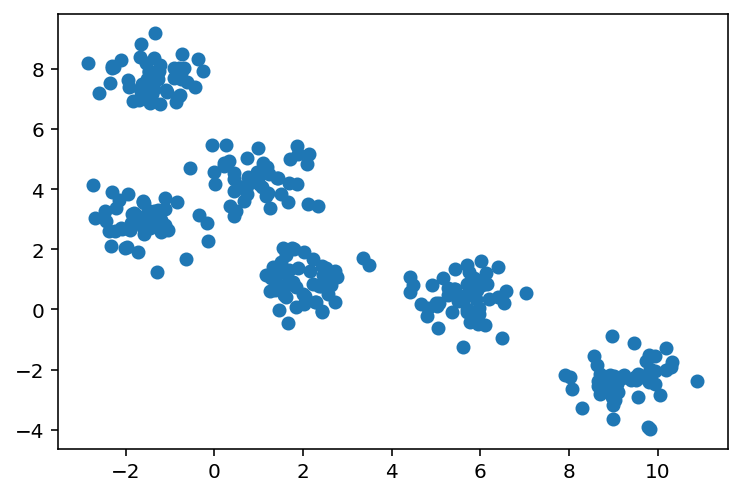

In [32]:
X3, y3 = make_blobs(n_samples=300, centers=6, cluster_std=0.6, random_state=0)
plt.scatter(X3[:,0], X3[:,1])
plt.show()

#### 4.2 eps의 기본값 0.5로 DBSCAN 모델 학습

In [43]:
model_5 = DBSCAN(eps=0.5).fit(X3)

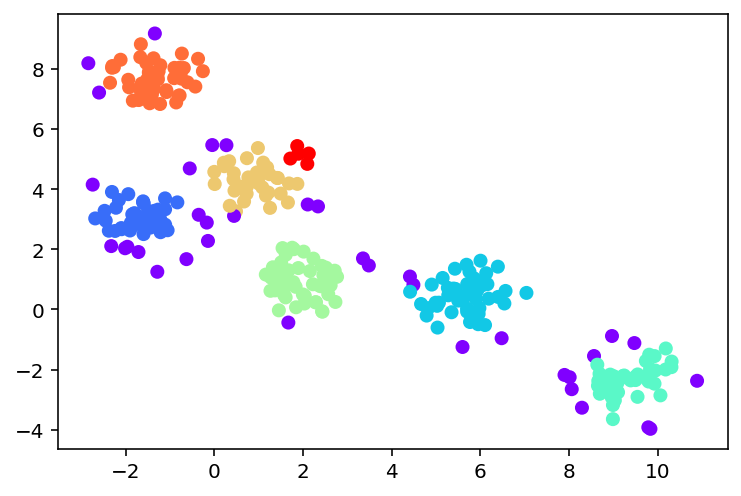

In [44]:
plt.scatter(X3[:,0], X3[:,1], c=model_5.labels_, cmap="rainbow")
plt.show()

#### 4.3 K-nearest neighbor를 이용하여 최적화된 eps값 구하기

In [45]:
from sklearn.neighbors import NearestNeighbors

In [46]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X3)
distances, indices = nbrs.kneighbors(X3) # nbrs : 알려달라

In [47]:
X3[: 5]

array([[-1.46826903,  3.26765447],
       [ 6.00506856,  1.62349966],
       [10.31288792, -1.92046896],
       [10.06473734, -2.86062091],
       [ 1.79417539,  2.0072219 ]])

In [48]:
distances[: 5]

array([[0.        , 0.11423238],
       [0.        , 0.34328702],
       [0.        , 0.15343017],
       [0.        , 0.41125286],
       [0.        , 0.0611787 ]])

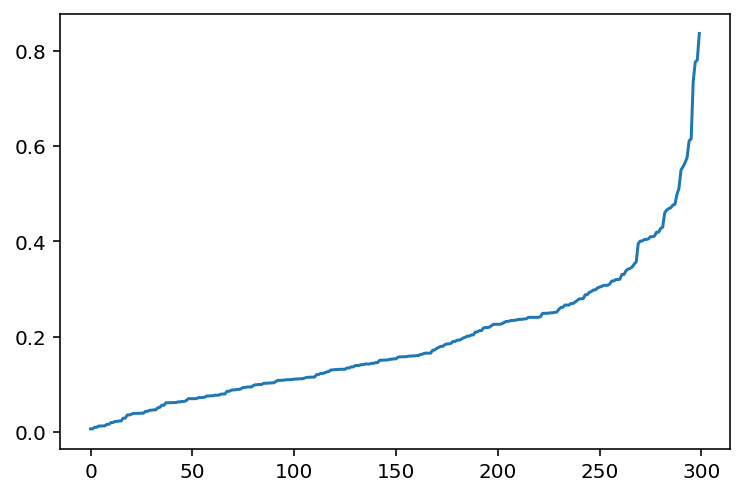

In [49]:
# 거리값 정렬
import numpy as np
distances = np.sort(distances, axis=0)

# 그래프 그리기 기울기의 급상승 하는 값은 0.3 ~ 0.6 어딘가
plt.plot(distances[:, 1])
plt.show()

In [51]:
# 거리값 출력
distances[:, 1][:5]

array([0.00647163, 0.00647163, 0.00975014, 0.00975014, 0.01234906])

In [52]:
# 기울기 값 구하기
distances_g = np.gradient(distances[:, 1]) # np.gradient : 기울기 구하는 함수
distances_g[:5]

array([0.        , 0.00163925, 0.00163925, 0.00129946, 0.00129946])

In [53]:
# 기울기가 최대가 되는 위치값 구하기
max_index = np.argmax(np.gradient(distances_g))

# 기울기가 최대가 되는 위치 값에있는 eps 값 구하기
opt_eps = distances[max_index][1]

opt_eps # 최적화 eps

0.6153561253807575

#### 4.4 최적화된 eps 값으로 모델 학습

In [54]:
# 최적 eps 값으로 모델 학습
model_6 = DBSCAN(eps=opt_eps).fit(X3)

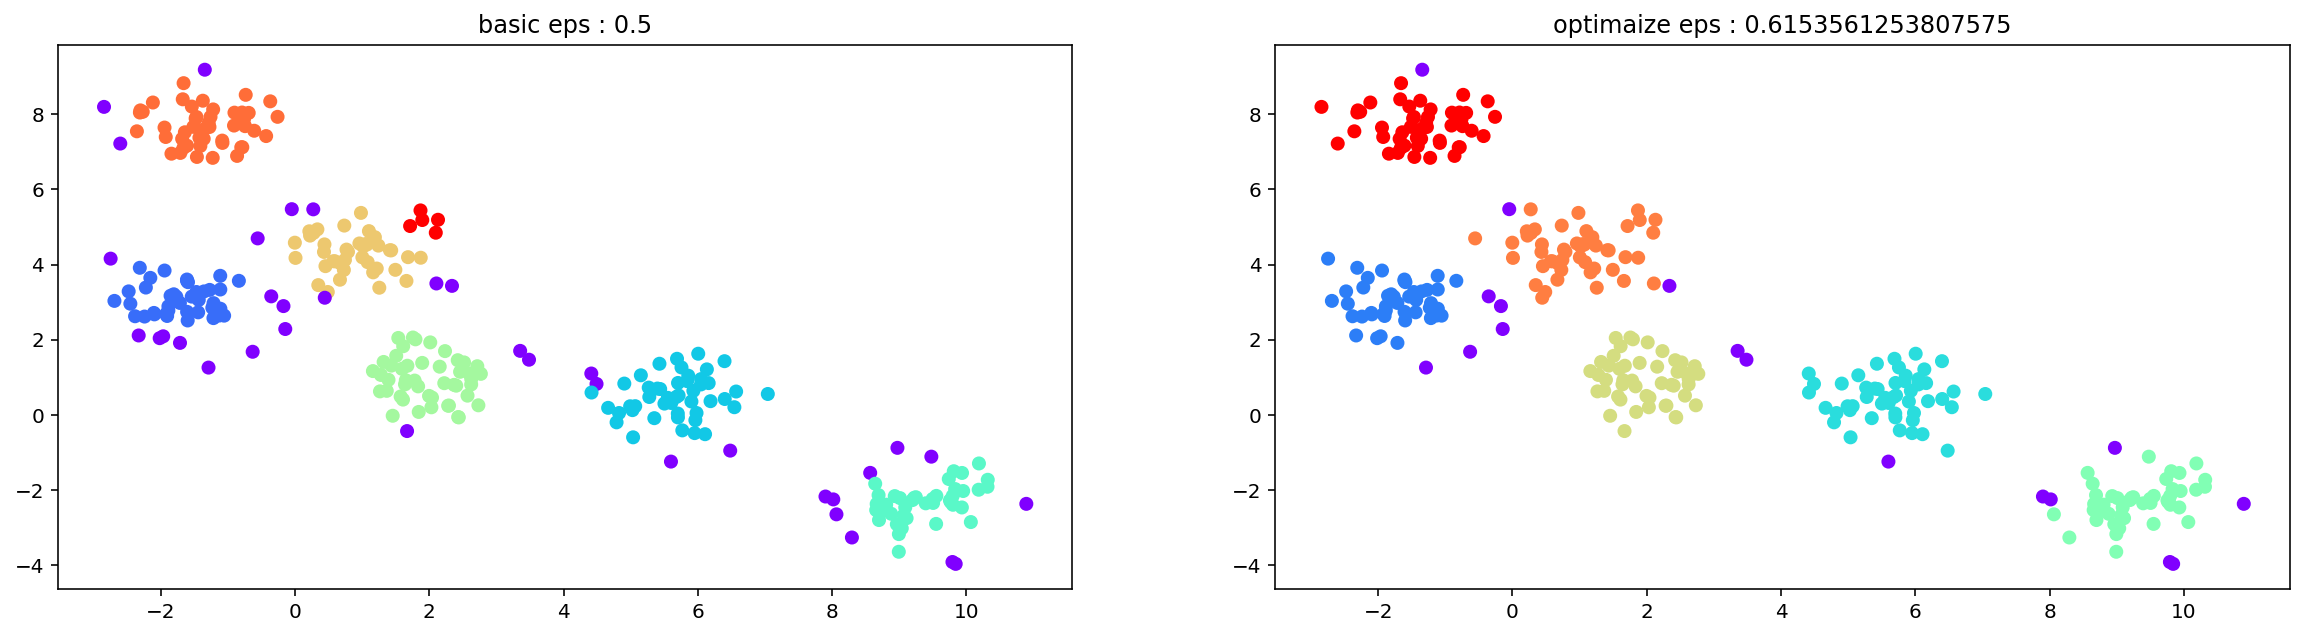

In [55]:
plt.figure(figsize=(20, 5))

plt.subplot(121)
plt.scatter(X3[:,0], X3[:,1], c=model_5.labels_, cmap="rainbow")
plt.title("basic eps : 0.5")

plt.subplot(122)
plt.scatter(X3[:,0], X3[:,1], c=model_6.labels_, cmap="rainbow")
plt.title("optimaize eps : {}".format(opt_eps))

plt.show()

#### 5. DBSCAN의 장단점
- 장점
    - 군집의 수(K)를 설정할 필요가 없음
    - 다양한 모양의 군집이 형성될 수 있으며 군집끼리 겹치는경우가 없음
    - 하이퍼 파라미터가 2개로 작은편
- 단점
    - 데이터는 하나의 군집에 속하게 되므로 시작점에 따라 다른 모양의 군집이 형성됨
    - eps 값에 의해 성능이 크게 좌우됨 : eps 값의 테스트를 많이 해보아야 함
    - 군집별 밀도가 다르면 군집화가 잘 이루어지지 않음